**Bob Chrismansyah**

H071201087

# Supervised Learning

In [ ]:
import  numpy as np
import pandas as pd

In [ ]:
data1=pd.read_csv('Data1.csv')
data1.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level
0,1,25,1,49,91107,4,1.6,1
1,2,45,19,34,90089,3,1.5,1
2,3,39,15,11,94720,1,1.0,1
3,4,35,9,100,94112,1,2.7,2
4,5,35,8,45,91330,4,1.0,2


In [ ]:
print(data1.shape)

(5000, 8)


In [ ]:
data2=pd.read_csv('Data2.csv')
data2.head()

,ID,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,0,1,0,0,0,NaN
1,2,0,1,0,0,0,NaN
2,3,0,0,0,0,0,NaN
3,4,0,0,0,0,0,NaN
4,5,0,0,0,0,1,NaN


In [ ]:
print(data2.shape)

(5000, 7)


# Menggabungkan Kedua Data

In [ ]:
data=data1.merge(data2)
data.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN


In [ ]:
data['LoanOnCard'].value_counts()

0.0    4500
1.0     480
Name: LoanOnCard, dtype: int64

In [ ]:
data.drop('ID',axis=1,inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  5000 non-null   int64  
 1   CustomerSince        5000 non-null   int64  
 2   HighestSpend         5000 non-null   int64  
 3   ZipCode              5000 non-null   int64  
 4   HiddenScore          5000 non-null   int64  
 5   MonthlyAverageSpend  5000 non-null   float64
 6   Level                5000 non-null   int64  
 7   Mortgage             5000 non-null   int64  
 8   Security             5000 non-null   int64  
 9   FixedDepositAccount  5000 non-null   int64  
 10  InternetBanking      5000 non-null   int64  
 11  CreditCard           5000 non-null   int64  
 12  LoanOnCard           4980 non-null   float64
dtypes: float64(2), int64(11)
memory usage: 546.9 KB


In [ ]:
data.shape

(5000, 13)

In [ ]:
data.dtypes

Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore              int64
MonthlyAverageSpend    float64
Level                    int64
Mortgage                 int64
Security                 int64
FixedDepositAccount      int64
InternetBanking          int64
CreditCard               int64
LoanOnCard             float64
dtype: object

In [ ]:
col=['Mortgage','Security','FixedDepositAccount']
for i in col:
    data[i]=data[i].astype('category')
data.dtypes

Age                       int64
CustomerSince             int64
HighestSpend              int64
ZipCode                   int64
HiddenScore               int64
MonthlyAverageSpend     float64
Level                     int64
Mortgage               category
Security               category
FixedDepositAccount    category
InternetBanking           int64
CreditCard                int64
LoanOnCard              float64
dtype: object

In [ ]:
col=['HighestSpend','MonthlyAverageSpend']
for i in col:
    data[i]=data[i].astype('int')
data.dtypes

Age                       int64
CustomerSince             int64
HighestSpend              int64
ZipCode                   int64
HiddenScore               int64
MonthlyAverageSpend       int64
Level                     int64
Mortgage               category
Security               category
FixedDepositAccount    category
InternetBanking           int64
CreditCard                int64
LoanOnCard              float64
dtype: object

In [ ]:
data.isna().sum()

Age                     0
CustomerSince           0
HighestSpend            0
ZipCode                 0
HiddenScore             0
MonthlyAverageSpend     0
Level                   0
Mortgage                0
Security                0
FixedDepositAccount     0
InternetBanking         0
CreditCard              0
LoanOnCard             20
dtype: int64

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.HiddenScore.value_counts()/data.LoanOnCard.count()

1    0.294378
2    0.259639
4    0.243976
3    0.202008
Name: HiddenScore, dtype: float64

In [ ]:
data.describe()

,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,InternetBanking,CreditCard,LoanOnCard
count,4980.000000,4980.000000,4980.00000,4980.000000,4980.000000,4980.000000,4980.000000,4980.000000,4980.000000,4980.000000
mean,45.352610,20.117671,73.85241,93152.420482,2.395582,1.515261,1.880924,0.597189,0.294378,0.096386
std,11.464212,11.468716,46.07009,2123.660073,1.147200,1.744002,0.840144,0.490513,0.455808,0.295149
min,23.000000,-3.000000,8.00000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,35.000000,10.000000,39.00000,91911.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,45.000000,20.000000,64.00000,93407.000000,2.000000,1.000000,2.000000,1.000000,0.000000,0.000000
75%,55.000000,30.000000,98.00000,94608.000000,3.000000,2.000000,3.000000,1.000000,1.000000,0.000000
max,67.000000,43.000000,224.00000,96651.000000,4.000000,10.000000,3.000000,1.000000,1.000000,1.000000


# Analisis Univariate

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set(color_codes=True)
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

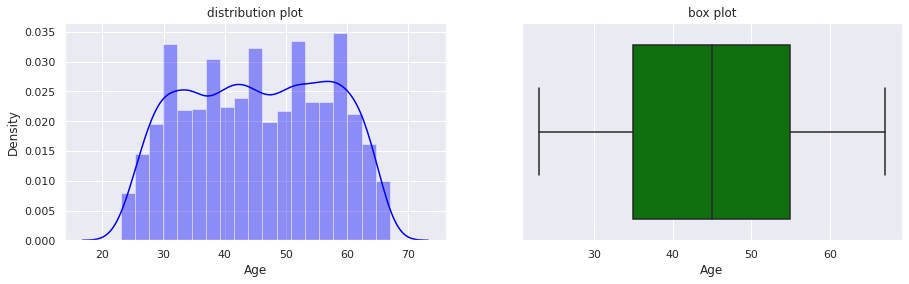

In [ ]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.title('distribution plot')
sns.distplot(data['Age'],color='blue')
plt.subplot(1,2,2)
plt.title('box plot')
sns.boxplot(data['Age'],orient='h',color='green')
plt.show()

# Mengelompokkan kategori variabel

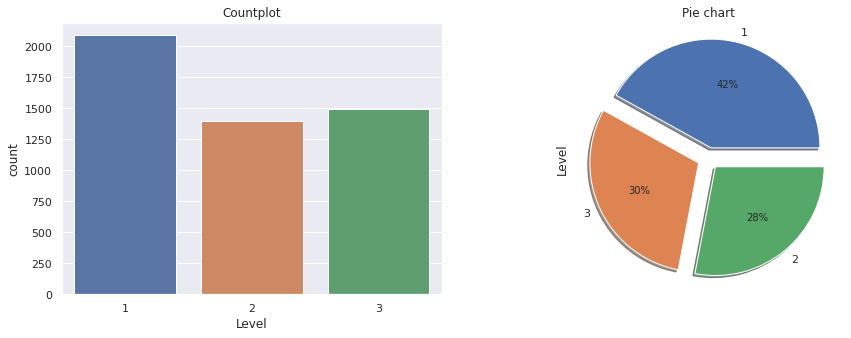

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('Countplot')
sns.countplot(data['Level'])
plt.subplot(1,2,2)
plt.title('Pie chart')
data['Level'].value_counts().plot.pie(shadow=True,explode=(0.1,0.1,0.1),autopct='%.0f%%');

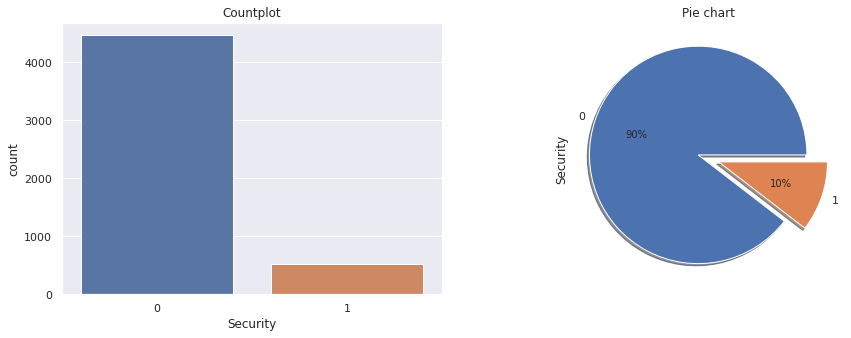

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('Countplot')
sns.countplot(data['Security'])
plt.subplot(1,2,2)
plt.title('Pie chart')
data['Security'].value_counts().plot.pie(shadow=True,explode=(0.1,0.1),autopct='%.0f%%');

# Bivariate Analisis

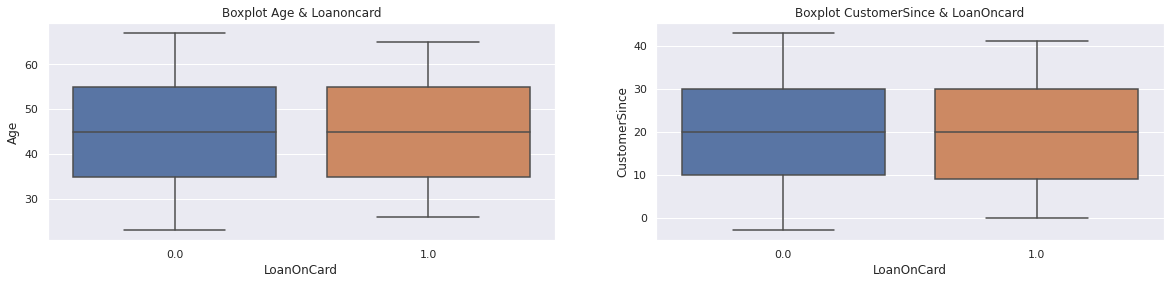

In [ ]:
plt.figure(figsize=(20,4))
plt.subplot(1,2,1)
plt.title('Boxplot Age & Loanoncard')
sns.boxplot(x='LoanOnCard', y='Age', data = data );
plt.subplot(1,2,2)
plt.title('Boxplot CustomerSince & LoanOncard')
sns.boxplot(x='LoanOnCard',y='CustomerSince', data=data );

# Multivariate Analysis

<Figure size 1440x576 with 0 Axes>

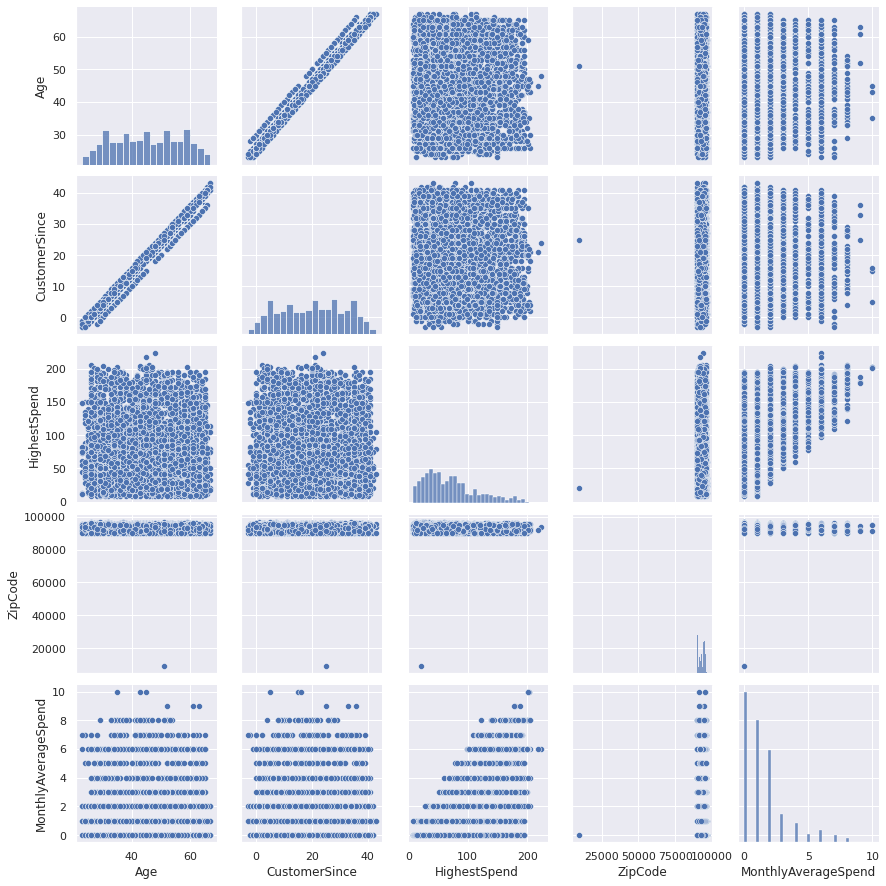

In [ ]:
plt.figure(figsize=(20,8));
sns.pairplot(data[['Age', 'CustomerSince', 'HighestSpend', 'ZipCode' ,'MonthlyAverageSpend']])

In [ ]:
df=data.groupby('LoanOnCard')
df.mean().reset_index()

,LoanOnCard,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,InternetBanking,CreditCard
0,0.0,45.383111,20.146889,66.290444,93152.337111,2.372444,1.304444,1.843333,0.596222,0.294000
1,1.0,45.066667,19.843750,144.745833,93153.202083,2.612500,3.491667,2.233333,0.606250,0.297917


In [ ]:
df=data.drop(columns=['Age','ZipCode','CustomerSince'])


# dihapus karena tidak banyak mempengaruhi variabel untuk mengurangi noise atau ganggungan dalam data saat pengujian

# Train

In [ ]:
from scipy import stats
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from scipy.stats import zscore
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
x=df.drop(columns='LoanOnCard')
y=data['LoanOnCard']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

# Logistic Regression

In [ ]:
logit = LogisticRegression()
logit.fit(x_train, y_train)

LogisticRegression()

# Accuracy Of the LR Model

In [ ]:
pred=logit.predict(x_test)
print('Accuracy on Training data:',logit.score(x_train, y_train) )
print('Accuracy on Test data:',logit.score(x_test, y_test) )

Accuracy on Training data: 0.9515203671830178
Accuracy on Test data: 0.9484605087014726


# Confusion Matrix

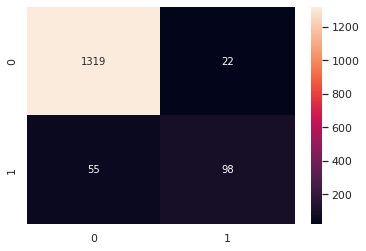

In [ ]:
sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt='g')

# Classification

In [ ]:
print("classification  Matrix:\n",classification_report(y_test,pred));

classification  Matrix:
               precision    recall  f1-score   support

         0.0       0.96      0.98      0.97      1341
         1.0       0.82      0.64      0.72       153

    accuracy                           0.95      1494
   macro avg       0.89      0.81      0.84      1494
weighted avg       0.95      0.95      0.95      1494



# NB classification

In [ ]:
from sklearn.naive_bayes import GaussianNB
model= GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

# Accuracy Of the NBC Model

In [ ]:
g_pred=model.predict(x_test)
print('Accuracy on Training data:',model.score(x_train, y_train))
print('Accuracy on Test data:',model.score(x_test, y_test) )

Accuracy on Training data: 0.8858290304073436
Accuracy on Test data: 0.8801874163319946


# Confusion Matrix

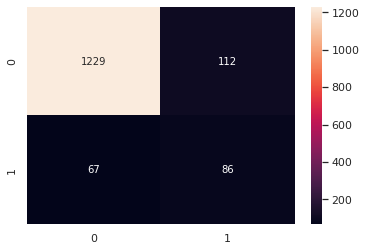

In [ ]:
sns.heatmap(confusion_matrix(y_test,g_pred),annot=True,fmt='g');

# Classification Report

In [ ]:
print("classification  Matrix:\n",classification_report(y_test,g_pred))

classification  Matrix:
               precision    recall  f1-score   support

         0.0       0.95      0.92      0.93      1341
         1.0       0.43      0.56      0.49       153

    accuracy                           0.88      1494
   macro avg       0.69      0.74      0.71      1494
weighted avg       0.90      0.88      0.89      1494

